In [29]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('new_result/all_concat_sentiment.csv')
data = data.drop(columns=['Unnamed: 0'])
data['date'] = pd.to_datetime(data['date'])

colors = ['#3269ED', '#6793F1', '#4BB1D7', '#ECC64A', '#2DB476']

data.head()

,date,review,rating,title,platform,thumbs_up_count,review_version,app_version,app,sentiment,subjectivity
0,2023-02-16 16:47:48,"Fantastic app, it changed my way to workout in...",5,"Amazing app, some improvements needed",AppStore,NaN,NaN,NaN,duoswim,0.334028,0.657639
1,2023-12-01 18:08:43,Brilliant app which not only looks great but w...,5,Highly recommend,AppStore,NaN,NaN,NaN,duoswim,0.263125,0.652500
2,2023-01-14 18:32:17,Positive: The coaching side seems ok and decen...,2,"Watch app is very limited, integration apple f...",AppStore,NaN,NaN,NaN,duoswim,0.138467,0.471448
3,2022-06-12 10:13:29,Finally a swim app that looks great and provid...,5,A brilliant app,AppStore,NaN,NaN,NaN,duoswim,0.350000,0.576923
4,2022-06-11 19:02:41,This app is very easy to use. I love how you c...,5,Great for all swimmers!,AppStore,NaN,NaN,NaN,duoswim,0.317778,0.529167


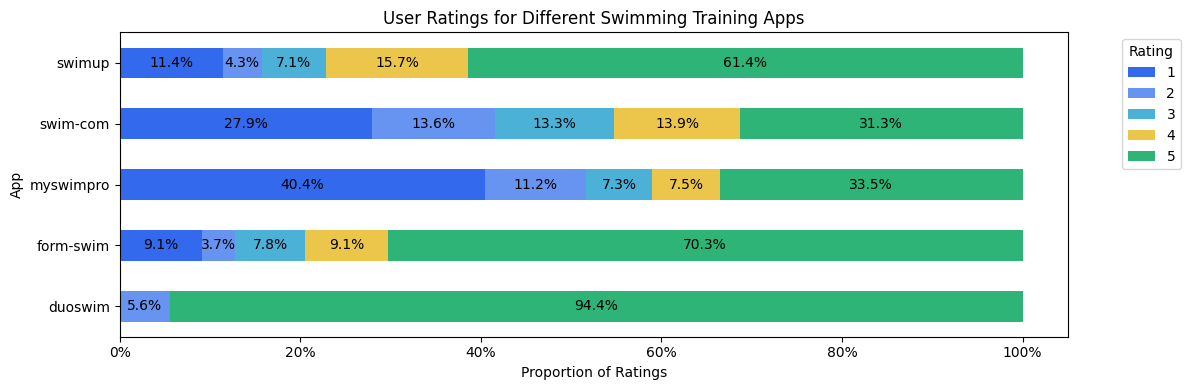

In [30]:
# 评分分布按应用程序
rating_counts = data.groupby(['app', 'rating']).size().unstack().fillna(0)

# 绘制评分分布的堆叠条形图
rating_counts_normalized = rating_counts.div(rating_counts.sum(axis=1), axis=0)

plt.rcParams['figure.figsize'] = [12, 4]
ax = rating_counts_normalized.plot(kind='barh', stacked=True, color=colors)

# 格式化x轴为百分比
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# 添加百分比数值
for container in ax.containers:
    labels = [f'{v.get_width() * 100:.1f}%' if v.get_width() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10)

plt.title('User Ratings for Different Swimming Training Apps')
plt.xlabel('Proportion of Ratings')
plt.ylabel('App')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # 确保应用程序名称是水平的
plt.tight_layout()
plt.show()

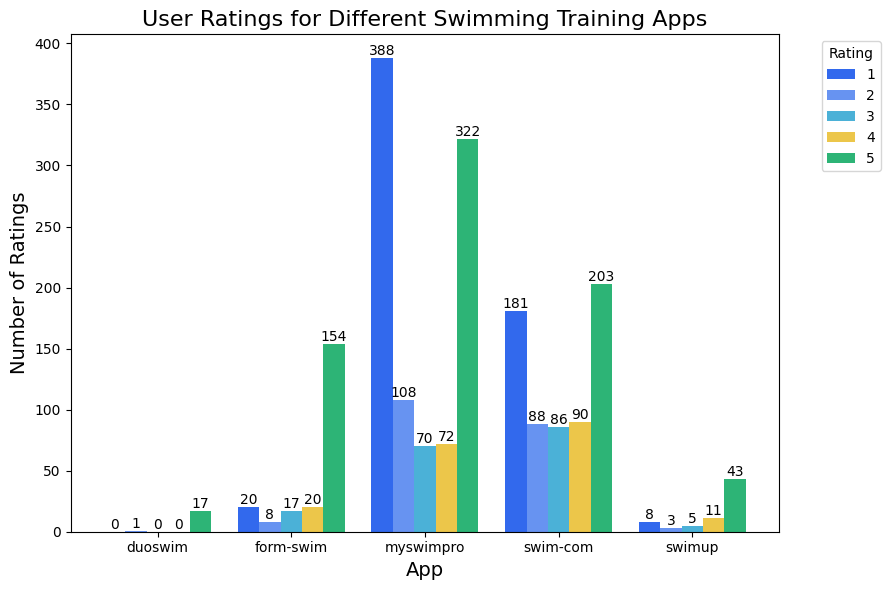

In [31]:
# 评分分布按应用程序
rating_counts = data.groupby(['app', 'rating']).size().unstack().fillna(0)

# 绘制评分分布的堆叠条形图
plt.rcParams['figure.figsize'] = [9, 6]
ax = rating_counts.plot(kind='bar', stacked=False, width=0.8, color=colors)

# 添加數據標籤
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('User Ratings for Different Swimming Training Apps', fontsize=16)
plt.xlabel('App', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # 确保应用程序名称是水平的
plt.tight_layout()
plt.show()


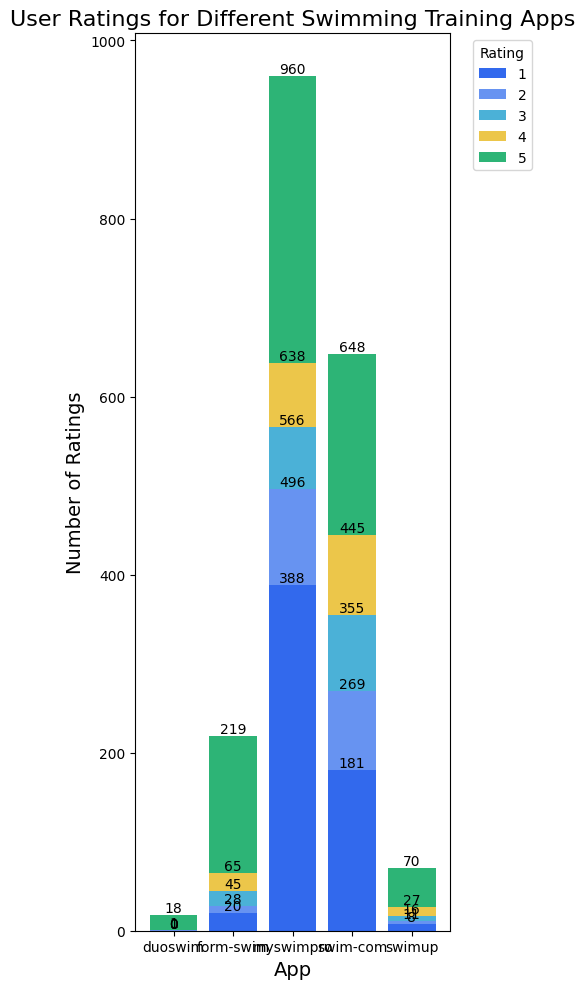

In [32]:
# 评分分布按应用程序
rating_counts = data.groupby(['app', 'rating']).size().unstack().fillna(0)

# 绘制评分分布的堆叠条形图
plt.rcParams['figure.figsize'] = [5, 10]
ax = rating_counts.plot(kind='bar', stacked=True, width=0.8, color=colors)

# 添加數據標籤
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('User Ratings for Different Swimming Training Apps', fontsize=16)
plt.xlabel('App', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # 确保应用程序名称是水平的
plt.tight_layout()
plt.show()


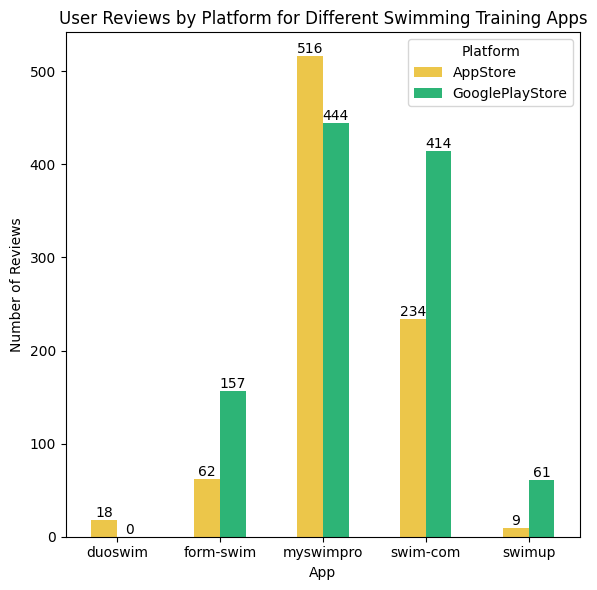

In [33]:
# 4. 平台评论数量分布按应用程序
platform_counts = data.groupby(['app', 'platform']).size().unstack().fillna(0)

plt.rcParams['figure.figsize'] = [6, 6]
ax = platform_counts.plot(kind='bar', stacked=False, color=colors[-2:])
plt.title('User Reviews by Platform for Different Swimming Training Apps')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.legend(title='Platform')
plt.xticks(rotation=0)  # 确保应用程序名称是水平的

# 添加数值标记
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

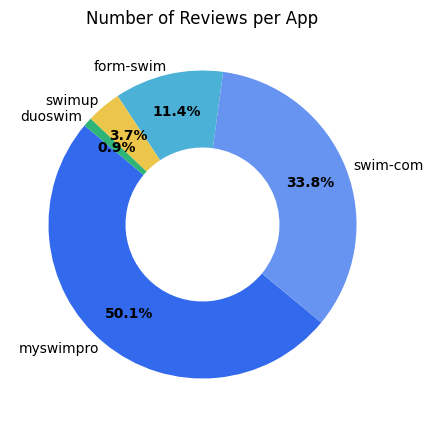

In [34]:
# 5. 每个应用的评论数量
app_counts = data['app'].value_counts()

plt.rcParams['figure.figsize'] = [5, 5]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(app_counts, autopct='%1.1f%%', startangle=140, colors=colors, textprops=dict(color="black"), pctdistance=0.75, labels=app_counts.index, labeldistance=1.05, wedgeprops=dict(width=0.5))

# 将百分比移到饼图的外部
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

plt.title('Number of Reviews per App')
plt.ylabel('')  # 隐藏默认的y标签
plt.show()


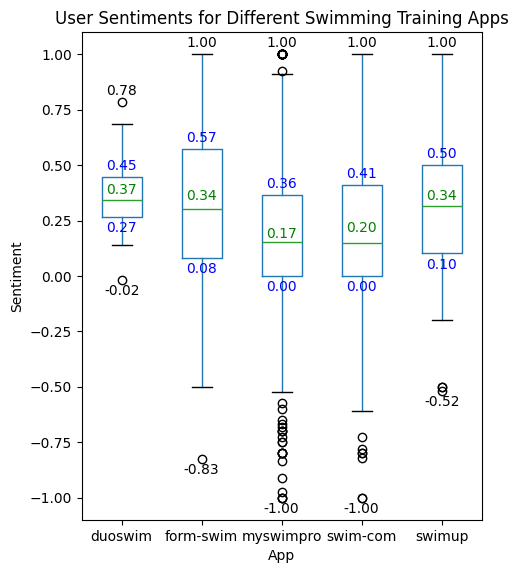

In [35]:
# 2. 情感分布按应用程序 - 箱线图
plt.rcParams['figure.figsize'] = [5, 6.5]
boxplot = data.boxplot(column='sentiment', by='app', grid=False)

plt.title('User Sentiments for Different Swimming Training Apps')
plt.xlabel('App')
plt.ylabel('Sentiment')
plt.suptitle('')
plt.xticks(rotation=0)  # 确保应用程序名称是水平的

# 获取每个箱线图的五数总结数据（最小值、第一四分位数、中位数、第三四分位数、最大值）
grouped = data.groupby('app')['sentiment']
stats = grouped.describe()

for i, app in enumerate(stats.index, 1):  # enumerate 从1开始，因为箱线图的箱子从1开始
    min_val = stats.loc[app, 'min']
    q1 = stats.loc[app, '25%']
    mean = stats.loc[app, 'mean']
    q3 = stats.loc[app, '75%']
    max_val = stats.loc[app, 'max']
    

    # 调整标签的位置和字体
    plt.text(i, q1 - 0.05, f'{q1:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue', bbox=dict(facecolor='none', edgecolor='none', alpha=0.5))
    plt.text(i, q3 + 0.05, f'{q3:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue', bbox=dict(facecolor='none', edgecolor='none', alpha=0.5))
    plt.text(i, mean + 0.02, f'{mean:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='green', bbox=dict(facecolor='none', edgecolor='none', alpha=0.5))
    plt.text(i, min_val - 0.05, f'{min_val:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', bbox=dict(facecolor='none', edgecolor='none', alpha=0.5))
    plt.text(i, max_val + 0.05, f'{max_val:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', bbox=dict(facecolor='none', edgecolor='none', alpha=0.5))

plt.show()


<Figure size 1200x800 with 0 Axes>

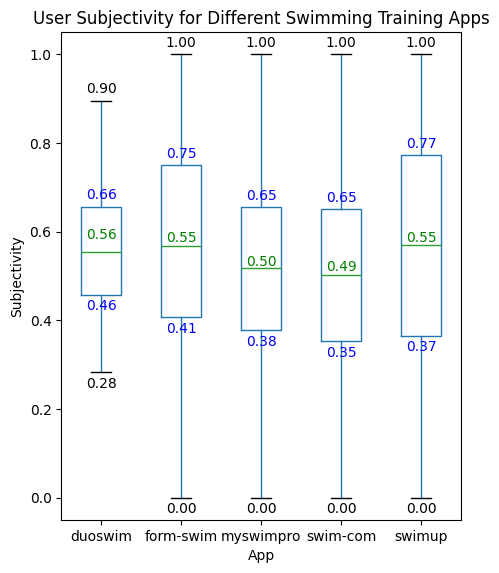

In [36]:

# 3. 主观性分布按应用程序 - 箱线图
plt.figure(figsize=(12, 8))
boxplot = data.boxplot(column='subjectivity', by='app', grid=False)

plt.title('User Subjectivity for Different Swimming Training Apps')
plt.xlabel('App')
plt.ylabel('Subjectivity')
plt.suptitle('')
plt.xticks(rotation=0)  # 确保应用程序名称是水平的

# 获取每个箱线图的五数总结数据（最小值、第一四分位数、中位数、第三四分位数、最大值）
grouped = data.groupby('app')['subjectivity']
stats = grouped.describe()

for i, app in enumerate(stats.index, 1):  # enumerate 从1开始，因为箱线图的箱子从1开始
    min_val = stats.loc[app, 'min']
    q1 = stats.loc[app, '25%']
    mean = stats.loc[app, 'mean']
    q3 = stats.loc[app, '75%']
    max_val = stats.loc[app, 'max']
    
    # 调整标签的位置和字体
    plt.text(i, q1 - 0.01, f'{q1:.2f}', horizontalalignment='center', verticalalignment='top', fontsize=10, color='blue', bbox=dict(facecolor='none', edgecolor='none', alpha=0.5))
    plt.text(i, mean + 0.05, f'{mean:.2f}', horizontalalignment='center', verticalalignment='top', fontsize=10, color='green', bbox=dict(facecolor='none', edgecolor='none', alpha=0.5))
    plt.text(i, q3 + 0.01, f'{q3:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='blue', bbox=dict(facecolor='none', edgecolor='none', alpha=0.5))
    plt.text(i, min_val - 0.01, f'{min_val:.2f}', horizontalalignment='center', verticalalignment='top', fontsize=10, color='black', bbox=dict(facecolor='none', edgecolor='none', alpha=0.5))
    plt.text(i, max_val + 0.01, f'{max_val:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black', bbox=dict(facecolor='none', edgecolor='none', alpha=0.5))

plt.show()

In [48]:
import pandas as pd

df = pd.read_csv('new_result/all_concat.csv')

df1 = df[df['app'] == 'duoswim']
df2 = df[df['app'] == 'form-swim']
df3 = df[df['app'] == 'myswimpro']
df4 = df[df['app'] == 'swim-com']
df5 = df[df['app'] == 'swimup']

ls = [[df1, 'duoswim'], [df2, 'form-swim'], [df3, 'myswimpro'], [df4, 'swim-com'], [df5, 'swimup']]
for i in ls:
    i[0].to_csv('new_result/' + i[1] + '.csv', index=False)